# SparkSalesAnalytics

## Challenge 1 - Adjusting Schema for CSV Data

### Importing Lib

In [70]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType

In [71]:
from pyspark.sql.functions import col, expr

### Create Spark Session

In [72]:
##spark.stop()

In [73]:
spark = (SparkSession.builder.appName("PySparkChallenge").getOrCreate())

### Create raw Schema

define all as String because it is raw data, before cleaning should be defined as string, inorder to avoid error, and after cleaning the data we will set the schema into appropriate way.

In [74]:
raw_schema = StructType([
    StructField("orderID",StringType(), True),
    StructField("product",StringType(), True),
    StructField("quantityOrdered",StringType(), True),
    StructField("priceEach",StringType(), True),
    StructField("orderDate",StringType(), True),
    StructField("purchaseAddress",StringType(), True)
])

### Read whole File in Folder

In [75]:
folder_path = './testdata/salesdata'

In [76]:
df = spark.read.csv(folder_path, header=True, schema=raw_schema)

In [77]:
df.printSchema()

root
 |-- orderID: string (nullable = true)
 |-- product: string (nullable = true)
 |-- quantityOrdered: string (nullable = true)
 |-- priceEach: string (nullable = true)
 |-- orderDate: string (nullable = true)
 |-- purchaseAddress: string (nullable = true)



In [78]:
df.show(10)

+-------+--------------------+---------------+---------+--------------+--------------------+
|orderID|             product|quantityOrdered|priceEach|     orderDate|     purchaseAddress|
+-------+--------------------+---------------+---------+--------------+--------------------+
| 295665|  Macbook Pro Laptop|              1|     1700|12/30/19 00:01|136 Church St, Ne...|
| 295666|  LG Washing Machine|              1|    600.0|12/29/19 07:03|562 2nd St, New Y...|
| 295667|USB-C Charging Cable|              1|    11.95|12/12/19 18:21|277 Main St, New ...|
| 295668|    27in FHD Monitor|              1|   149.99|12/22/19 15:13|410 6th St, San F...|
| 295669|USB-C Charging Cable|              1|    11.95|12/18/19 12:38|43 Hill St, Atlan...|
| 295670|AA Batteries (4-p...|              1|     3.84|12/31/19 22:58|200 Jefferson St,...|
| 295671|USB-C Charging Cable|              1|    11.95|12/16/19 15:10|928 12th St, Port...|
| 295672|USB-C Charging Cable|              2|    11.95|12/13/19 09:29

## Challenge 2 - Data Cleaning ,Standaring, and Outputing

In [79]:
df2 = df.filter(col("orderID").isNull() == False)

In [80]:
df2.show()

+-------+--------------------+---------------+---------+--------------+--------------------+
|orderID|             product|quantityOrdered|priceEach|     orderDate|     purchaseAddress|
+-------+--------------------+---------------+---------+--------------+--------------------+
| 295665|  Macbook Pro Laptop|              1|     1700|12/30/19 00:01|136 Church St, Ne...|
| 295666|  LG Washing Machine|              1|    600.0|12/29/19 07:03|562 2nd St, New Y...|
| 295667|USB-C Charging Cable|              1|    11.95|12/12/19 18:21|277 Main St, New ...|
| 295668|    27in FHD Monitor|              1|   149.99|12/22/19 15:13|410 6th St, San F...|
| 295669|USB-C Charging Cable|              1|    11.95|12/18/19 12:38|43 Hill St, Atlan...|
| 295670|AA Batteries (4-p...|              1|     3.84|12/31/19 22:58|200 Jefferson St,...|
| 295671|USB-C Charging Cable|              1|    11.95|12/16/19 15:10|928 12th St, Port...|
| 295672|USB-C Charging Cable|              2|    11.95|12/13/19 09:29

In [81]:
df2.filter(col("orderID") == "Order ID").show()

+--------+-------+----------------+----------+----------+----------------+
| orderID|product| quantityOrdered| priceEach| orderDate| purchaseAddress|
+--------+-------+----------------+----------+----------+----------------+
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantity Ordered|Price Each|Order Date|Purchase Address|
|Order ID|Product|Quantit

If you take a closer look at the above data, the Order ID content is actually equivalent to the Column Name.

This is also true for the rest of the columns and you are required to remove these records from the sales dataframe.

In [82]:
filtered_df = df2.filter(col("orderID") != "Order ID")

In [83]:
filtered_df.show()

+-------+--------------------+---------------+---------+--------------+--------------------+
|orderID|             product|quantityOrdered|priceEach|     orderDate|     purchaseAddress|
+-------+--------------------+---------------+---------+--------------+--------------------+
| 295665|  Macbook Pro Laptop|              1|     1700|12/30/19 00:01|136 Church St, Ne...|
| 295666|  LG Washing Machine|              1|    600.0|12/29/19 07:03|562 2nd St, New Y...|
| 295667|USB-C Charging Cable|              1|    11.95|12/12/19 18:21|277 Main St, New ...|
| 295668|    27in FHD Monitor|              1|   149.99|12/22/19 15:13|410 6th St, San F...|
| 295669|USB-C Charging Cable|              1|    11.95|12/18/19 12:38|43 Hill St, Atlan...|
| 295670|AA Batteries (4-p...|              1|     3.84|12/31/19 22:58|200 Jefferson St,...|
| 295671|USB-C Charging Cable|              1|    11.95|12/16/19 15:10|928 12th St, Port...|
| 295672|USB-C Charging Cable|              2|    11.95|12/13/19 09:29

### Extract City into New Column.

In [84]:
from pyspark.sql.functions import split

In [85]:
extract_df = filtered_df.select(col("orderID"), col("product"), col("quantityOrdered"), col("priceEach"), col("orderDate"), col("purchaseAddress"))

In [86]:
extract_df_2 = extract_df.withColumn("State", split(split("purchaseAddress", ",")[2], " ")[1])
extract_df_3 = extract_df_2.withColumn("City", split("purchaseAddress", ",")[1])

In [87]:
extract_df_3.show()

+-------+--------------------+---------------+---------+--------------+--------------------+-----+--------------+
|orderID|             product|quantityOrdered|priceEach|     orderDate|     purchaseAddress|State|          City|
+-------+--------------------+---------------+---------+--------------+--------------------+-----+--------------+
| 295665|  Macbook Pro Laptop|              1|     1700|12/30/19 00:01|136 Church St, Ne...|   NY| New York City|
| 295666|  LG Washing Machine|              1|    600.0|12/29/19 07:03|562 2nd St, New Y...|   NY| New York City|
| 295667|USB-C Charging Cable|              1|    11.95|12/12/19 18:21|277 Main St, New ...|   NY| New York City|
| 295668|    27in FHD Monitor|              1|   149.99|12/22/19 15:13|410 6th St, San F...|   CA| San Francisco|
| 295669|USB-C Charging Cable|              1|    11.95|12/18/19 12:38|43 Hill St, Atlan...|   GA|       Atlanta|
| 295670|AA Batteries (4-p...|              1|     3.84|12/31/19 22:58|200 Jefferson St,

### Standarize Data Types and Column Rename

**Rename Columns;**

Order ID -> OrderID

Quantity Ordered -> Quantity

Order Date -> OrderDate

Purchase Address -> StoreAddress


**Change DataTypes;**

OrderID = Integer

Product = String

Quantity = Integer

Price = Float

OrderDate = Timestamp with Format: "MM/dd/yy HH:mm"

StoreAddress = String

City = String

State = String

### Change Type to Timestamp

In [88]:
from pyspark.sql.functions import year, month, to_timestamp
from pyspark.sql.types import IntegerType, FloatType

In [89]:
temp_df = (extract_df_3.withColumn("orderID", col("orderID").cast(IntegerType()))
           .withColumn("Quantity", col("quantityOrdered").cast(IntegerType())) 
           .withColumn("orderDate", to_timestamp("orderDate", "MM/dd/yy HH:mm")) 
           .withColumn("Price", col("priceEach").cast(FloatType()))
           .withColumnRenamed("purchaseAddress","StoreAddress")
           .drop("priceEach")
           .drop("quantityOrdered"))

In [90]:
temp_df.show()

+-------+--------------------+-------------------+--------------------+-----+--------------+--------+------+
|orderID|             product|          orderDate|        StoreAddress|State|          City|Quantity| Price|
+-------+--------------------+-------------------+--------------------+-----+--------------+--------+------+
| 295665|  Macbook Pro Laptop|2019-12-30 00:01:00|136 Church St, Ne...|   NY| New York City|       1|1700.0|
| 295666|  LG Washing Machine|2019-12-29 07:03:00|562 2nd St, New Y...|   NY| New York City|       1| 600.0|
| 295667|USB-C Charging Cable|2019-12-12 18:21:00|277 Main St, New ...|   NY| New York City|       1| 11.95|
| 295668|    27in FHD Monitor|2019-12-22 15:13:00|410 6th St, San F...|   CA| San Francisco|       1|149.99|
| 295669|USB-C Charging Cable|2019-12-18 12:38:00|43 Hill St, Atlan...|   GA|       Atlanta|       1| 11.95|
| 295670|AA Batteries (4-p...|2019-12-31 22:58:00|200 Jefferson St,...|   NY| New York City|       1|  3.84|
| 295671|USB-C Char

In [91]:
temp_df.printSchema()

root
 |-- orderID: integer (nullable = true)
 |-- product: string (nullable = true)
 |-- orderDate: timestamp (nullable = true)
 |-- StoreAddress: string (nullable = true)
 |-- State: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Price: float (nullable = true)



### Get Year

In [92]:
year_df = temp_df.withColumn("ReportYear", year("orderDate"))

In [93]:
year_df.show()

+-------+--------------------+-------------------+--------------------+-----+--------------+--------+------+----------+
|orderID|             product|          orderDate|        StoreAddress|State|          City|Quantity| Price|ReportYear|
+-------+--------------------+-------------------+--------------------+-----+--------------+--------+------+----------+
| 295665|  Macbook Pro Laptop|2019-12-30 00:01:00|136 Church St, Ne...|   NY| New York City|       1|1700.0|      2019|
| 295666|  LG Washing Machine|2019-12-29 07:03:00|562 2nd St, New Y...|   NY| New York City|       1| 600.0|      2019|
| 295667|USB-C Charging Cable|2019-12-12 18:21:00|277 Main St, New ...|   NY| New York City|       1| 11.95|      2019|
| 295668|    27in FHD Monitor|2019-12-22 15:13:00|410 6th St, San F...|   CA| San Francisco|       1|149.99|      2019|
| 295669|USB-C Charging Cable|2019-12-18 12:38:00|43 Hill St, Atlan...|   GA|       Atlanta|       1| 11.95|      2019|
| 295670|AA Batteries (4-p...|2019-12-31

### Get Month

In [94]:
temp_year_df = year_df.withColumn("Month", month("orderDate"))

In [95]:
temp_year_df.show()

+-------+--------------------+-------------------+--------------------+-----+--------------+--------+------+----------+-----+
|orderID|             product|          orderDate|        StoreAddress|State|          City|Quantity| Price|ReportYear|Month|
+-------+--------------------+-------------------+--------------------+-----+--------------+--------+------+----------+-----+
| 295665|  Macbook Pro Laptop|2019-12-30 00:01:00|136 Church St, Ne...|   NY| New York City|       1|1700.0|      2019|   12|
| 295666|  LG Washing Machine|2019-12-29 07:03:00|562 2nd St, New Y...|   NY| New York City|       1| 600.0|      2019|   12|
| 295667|USB-C Charging Cable|2019-12-12 18:21:00|277 Main St, New ...|   NY| New York City|       1| 11.95|      2019|   12|
| 295668|    27in FHD Monitor|2019-12-22 15:13:00|410 6th St, San F...|   CA| San Francisco|       1|149.99|      2019|   12|
| 295669|USB-C Charging Cable|2019-12-18 12:38:00|43 Hill St, Atlan...|   GA|       Atlanta|       1| 11.95|      2019

### Output to Paraquet

In [96]:
final_df = temp_year_df.select("orderId","product","orderDate","StoreAddress","State","City","Quantity","Price","ReportYear","Month")

In [97]:
output_path = "./data/output/sales"

In [98]:
final_df.write.mode("overwrite").partitionBy("ReportYear","Month").parquet(output_path)

## Challenge 3 - Sales Analytics Year 2019

In [99]:
sales_path = './data/output/sales/'
partition = 'ReportYear=2019'
sales_2019_path = f"{sales_path}{partition}"

In [100]:
sales2019_df = spark.read.parquet(sales_2019_path)

In [101]:
sales2019_df.show(truncate=False)

+-------+--------------------------+-------------------+-----------------------------------------+-----+--------------+--------+------+-----+
|orderId|product                   |orderDate          |StoreAddress                             |State|City          |Quantity|Price |Month|
+-------+--------------------------+-------------------+-----------------------------------------+-----+--------------+--------+------+-----+
|295665 |Macbook Pro Laptop        |2019-12-30 00:01:00|136 Church St, New York City, NY 10001   |NY   | New York City|1       |1700.0|12   |
|295666 |LG Washing Machine        |2019-12-29 07:03:00|562 2nd St, New York City, NY 10001      |NY   | New York City|1       |600.0 |12   |
|295667 |USB-C Charging Cable      |2019-12-12 18:21:00|277 Main St, New York City, NY 10001     |NY   | New York City|1       |11.95 |12   |
|295668 |27in FHD Monitor          |2019-12-22 15:13:00|410 6th St, San Francisco, CA 94016      |CA   | San Francisco|1       |149.99|12   |
|29566

In [102]:
sales2019_df.printSchema()

root
 |-- orderId: integer (nullable = true)
 |-- product: string (nullable = true)
 |-- orderDate: timestamp (nullable = true)
 |-- StoreAddress: string (nullable = true)
 |-- State: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Price: float (nullable = true)
 |-- Month: integer (nullable = true)



In [103]:
sales_q1_df = (sales2019_df.select(col("orderId"),
                                   col("Month"),
                                   col("Price"),
                                   col("Quantity"),
                                   expr("Price*Quantity").alias("Sales")))

In [116]:
from pyspark.sql.functions import sum, round
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Highest Sales in Month.

In [105]:
sales_q1_df = (sales_q1_df.
               groupBy("Month").
               agg(sum("Sales").alias("TotalSales")).
               orderBy("TotalSales", ascending=False))

In [106]:
sales_q1_df.show()

+-----+------------------+
|Month|        TotalSales|
+-----+------------------+
|   12|  4613443.31607008|
|   10| 3736726.860444069|
|    4|3390670.2231714725|
|   11| 3199603.184257984|
|    5|3152606.7349271774|
|    3|2807100.3656582832|
|    7|2647775.7468385696|
|    6| 2577802.247295618|
|    8|2244467.8685896397|
|    2| 2202022.408319235|
|    9|2097560.1194250584|
|    1| 1813586.431374073|
+-----+------------------+



In [107]:
sales_q1_pd = (sales_q1_df.orderBy("Month")).toPandas()

In [113]:
sales_q1_pd

,Month,TotalSales
0,1,1.813586e+06
1,2,2.202022e+06
2,3,2.807100e+06
3,4,3.390670e+06
4,5,3.152607e+06
5,6,2.577802e+06
6,7,2.647776e+06
7,8,2.244468e+06
8,9,2.097560e+06
9,10,3.736727e+06


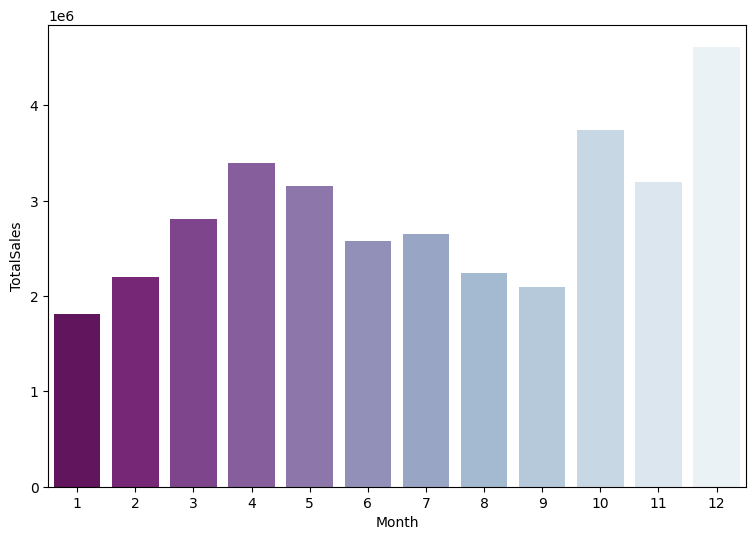

In [118]:
plt.figure(figsize=(9,6))
ax = sns.barplot(x="Month",y="TotalSales",data=sales_q1_pd,palette=sns.color_palette('BuPu_r', n_colors=12))

#### Which City Sold most Product.

In [134]:
from pyspark.sql.functions import count, col, countDistinct

In [125]:
product_q1_df = (sales2019_df.select(col("orderId"),
                                   col("product").alias("Product"),
                                   col("City"),
                                   col("Month"),
                                   col("Price"),
                                   col("Quantity")))

In [133]:
product_q1_df.show()

+-------+--------------------+--------------+-----+------+--------+
|orderId|             Product|          City|Month| Price|Quantity|
+-------+--------------------+--------------+-----+------+--------+
| 295665|  Macbook Pro Laptop| New York City|   12|1700.0|       1|
| 295666|  LG Washing Machine| New York City|   12| 600.0|       1|
| 295667|USB-C Charging Cable| New York City|   12| 11.95|       1|
| 295668|    27in FHD Monitor| San Francisco|   12|149.99|       1|
| 295669|USB-C Charging Cable|       Atlanta|   12| 11.95|       1|
| 295670|AA Batteries (4-p...| New York City|   12|  3.84|       1|
| 295671|USB-C Charging Cable|      Portland|   12| 11.95|       1|
| 295672|USB-C Charging Cable|        Dallas|   12| 11.95|       2|
| 295673|Bose SoundSport H...|        Dallas|   12| 99.99|       1|
| 295674|AAA Batteries (4-...|        Dallas|   12|  2.99|       4|
| 295675|USB-C Charging Cable| San Francisco|   12| 11.95|       2|
| 295676|     ThinkPad Laptop|   Los Angeles|   

In [137]:
product_q1_df_sold = (product_q1_df.
               groupBy("City").
               agg(sum("Quantity").alias("qtySold")).
               orderBy("qtySold", ascending=False))

In [138]:
product_q1_df_sold.show()

+--------------+-------+
|          City|qtySold|
+--------------+-------+
| San Francisco|  50226|
|   Los Angeles|  33288|
| New York City|  27916|
|        Boston|  22524|
|        Dallas|  16728|
|       Atlanta|  16602|
|       Seattle|  16552|
|      Portland|  14051|
|        Austin|  11151|
+--------------+-------+



In [140]:
product_q1_pd = (product_q1_df_sold.orderBy("qtySold")).toPandas()

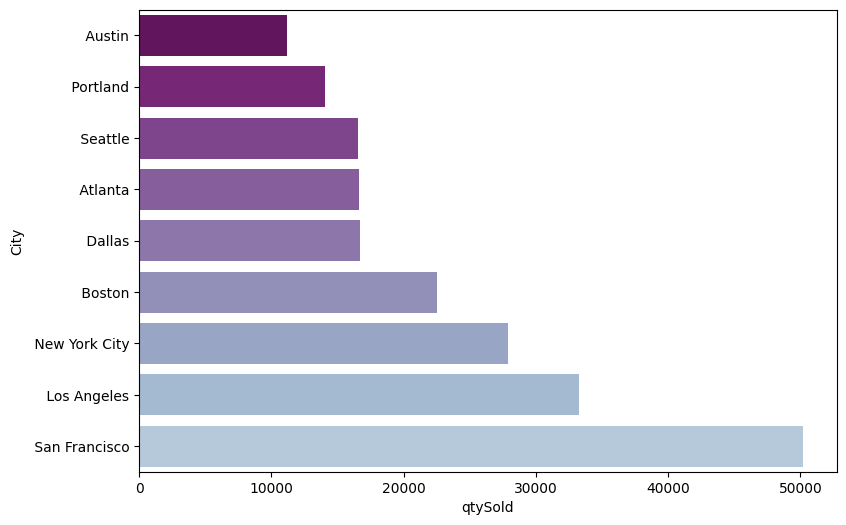

In [142]:
plt.figure(figsize=(9,6))
ax = sns.barplot(y="City",x="qtySold",data=product_q1_pd,palette=sns.color_palette('BuPu_r', n_colors=12))

#### When Customer Purchase the most (Maximize Ads)

In [159]:
from pyspark.sql.functions import col, date_format

In [170]:
sales2019_df.filter(col("orderId") == "295681").show(truncate=False)

+-------+--------------------------+-------------------+---------------------------+-----+-------+--------+-----+-----+
|orderId|product                   |orderDate          |StoreAddress               |State|City   |Quantity|Price|Month|
+-------+--------------------------+-------------------+---------------------------+-----+-------+--------+-----+-----+
|295681 |Google Phone              |2019-12-25 12:37:00|79 Elm St, Boston, MA 02215|MA   | Boston|1       |600.0|12   |
|295681 |USB-C Charging Cable      |2019-12-25 12:37:00|79 Elm St, Boston, MA 02215|MA   | Boston|1       |11.95|12   |
|295681 |Bose SoundSport Headphones|2019-12-25 12:37:00|79 Elm St, Boston, MA 02215|MA   | Boston|1       |99.99|12   |
|295681 |Wired Headphones          |2019-12-25 12:37:00|79 Elm St, Boston, MA 02215|MA   | Boston|1       |11.99|12   |
+-------+--------------------------+-------------------+---------------------------+-----+-------+--------+-----+-----+



in this case for each orderId has multiple product, this is mean for each orderId customer may purchase more than one product.

In [160]:
hour_data_df = sales2019_df.select(col("orderId"), date_format("orderDate","HH").cast('int').alias("Hour"))

In [171]:
hour_data_df.show()

+-------+----+
|orderId|Hour|
+-------+----+
| 295665|   0|
| 295666|   7|
| 295667|  18|
| 295668|  15|
| 295669|  12|
| 295670|  22|
| 295671|  15|
| 295672|   9|
| 295673|  23|
| 295674|  11|
| 295675|  13|
| 295676|  17|
| 295677|  19|
| 295678|   9|
| 295679|   9|
| 295680|  14|
| 295681|  12|
| 295681|  12|
| 295681|  12|
| 295681|  12|
+-------+----+
only showing top 20 rows



In [167]:
count_hour_purchase = hour_data_df.groupBy("Hour").agg(countDistinct("orderId").alias("TotalPurchase")).orderBy("TotalPurchase", ascending=False)

In [168]:
count_hour_purchase.show()

+----+-------------+
|Hour|TotalPurchase|
+----+-------------+
|  19|        12377|
|  12|        12082|
|  11|        11882|
|  20|        11763|
|  18|        11761|
|  13|        11682|
|  14|        10522|
|  21|        10499|
|  10|        10492|
|  17|        10476|
|  16|         9960|
|  15|         9761|
|  22|         8453|
|   9|         8404|
|   8|         6036|
|  23|         5990|
|   7|         3836|
|   0|         3748|
|   6|         2375|
|   1|         2246|
+----+-------------+
only showing top 20 rows



table above shown the hour where customer mostly purchase their product.

In [173]:
hour_purchase_pd = (count_hour_purchase.orderBy("TotalPurchase")).toPandas()

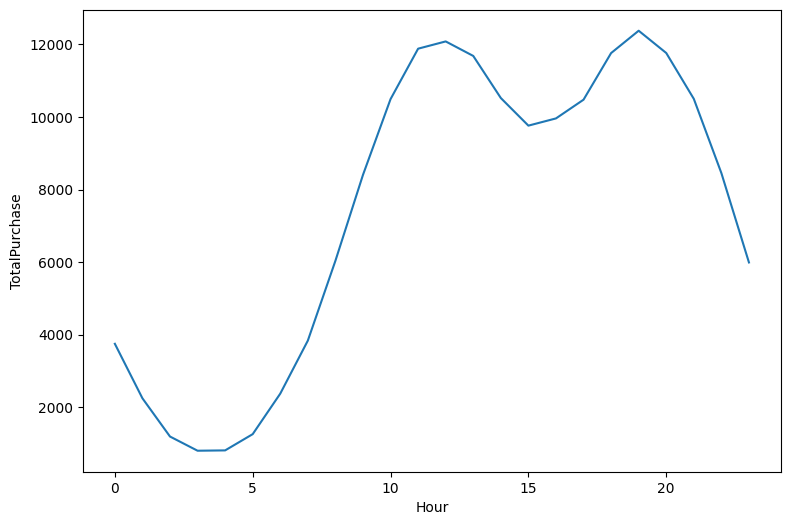

In [175]:
plt.figure(figsize=(9,6))
ax = sns.lineplot(x="Hour",y="TotalPurchase",data=hour_purchase_pd)

#### Product that Bought together?

suppose we want to know what is product that usually bought together at a single time.

In [183]:
from pyspark.sql.functions import collect_list, size

In [185]:
product_q1_df_list = (product_q1_df.
               groupBy("orderId").
               agg(collect_list("Product").alias("productList")).
                     orderBy("orderId"))

In [180]:
product_q1_df_list.show(truncate=False)

+-------+----------------------------+
|orderId|productList                 |
+-------+----------------------------+
|141234 |[iPhone]                    |
|141235 |[Lightning Charging Cable]  |
|141236 |[Wired Headphones]          |
|141237 |[27in FHD Monitor]          |
|141238 |[Wired Headphones]          |
|141239 |[AAA Batteries (4-pack)]    |
|141240 |[27in 4K Gaming Monitor]    |
|141241 |[USB-C Charging Cable]      |
|141242 |[Bose SoundSport Headphones]|
|141243 |[Apple Airpods Headphones]  |
|141244 |[Apple Airpods Headphones]  |
|141245 |[Macbook Pro Laptop]        |
|141246 |[AAA Batteries (4-pack)]    |
|141247 |[27in FHD Monitor]          |
|141248 |[Flatscreen TV]             |
|141249 |[27in FHD Monitor]          |
|141250 |[Vareebadd Phone]           |
|141251 |[Apple Airpods Headphones]  |
|141252 |[USB-C Charging Cable]      |
|141253 |[AA Batteries (4-pack)]     |
+-------+----------------------------+
only showing top 20 rows



aggregated product_id into list of product.

In [197]:
count_df = product_q1_df_list.select("productList", size("productList").alias("size"))
count_df = count_df.filter(col("size") >= 2)
count_df.orderBy("size", ascending = False).show(truncate=False)

+--------------------------------------------------------------------------------------------+----+
|productList                                                                                 |size|
+--------------------------------------------------------------------------------------------+----+
|[iPhone, Lightning Charging Cable, Apple Airpods Headphones, Wired Headphones, Google Phone]|5   |
|[iPhone, Lightning Charging Cable, Wired Headphones, AA Batteries (4-pack)]                 |4   |
|[Vareebadd Phone, USB-C Charging Cable, Bose SoundSport Headphones, Wired Headphones]       |4   |
|[Google Phone, USB-C Charging Cable, Bose SoundSport Headphones, Wired Headphones]          |4   |
|[Google Phone, USB-C Charging Cable, Bose SoundSport Headphones, Wired Headphones]          |4   |
|[Google Phone, USB-C Charging Cable, Wired Headphones, Wired Headphones]                    |4   |
|[Google Phone, USB-C Charging Cable, Wired Headphones, Apple Airpods Headphones]            |4   |


find occurence of product list.

In [206]:
bought_together_df = (count_df.groupBy("productList").count().
                     orderBy("count"))

In [207]:
bought_together_df.orderBy("count",ascending=False).show(n=5,truncate=False)

+---------------------------------------+-----+
|productList                            |count|
+---------------------------------------+-----+
|[iPhone, Lightning Charging Cable]     |881  |
|[Google Phone, USB-C Charging Cable]   |856  |
|[iPhone, Wired Headphones]             |361  |
|[Vareebadd Phone, USB-C Charging Cable]|312  |
|[Google Phone, Wired Headphones]       |303  |
+---------------------------------------+-----+
only showing top 5 rows

